<a href="https://colab.research.google.com/github/justlikethatHwan/Python/blob/main/240119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, sys
from google.colab import drive
drive.mount('/content/drive')

!wget http://bit.ly/fruits_300_data -O fruits_300.npy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2024-01-19 00:21:23--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-01-19 00:21:23--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-01-19 00:21:24--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.

In [10]:
fruits = np.load('fruits_300.npy')

In [11]:
fruits.shape

(300, 100, 100)

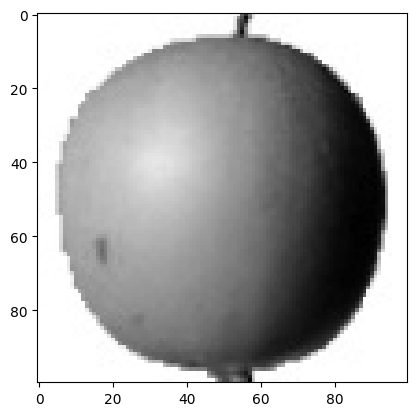

In [12]:
plt.imshow(fruits[0], cmap='gray_r')

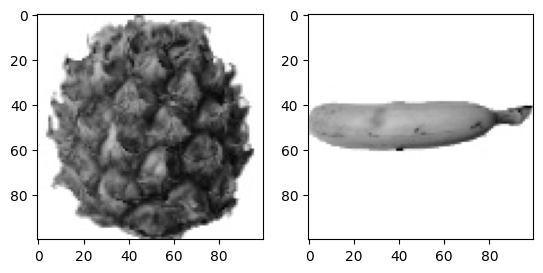

In [13]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [14]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [16]:
apple.shape

(100, 10000)

In [17]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

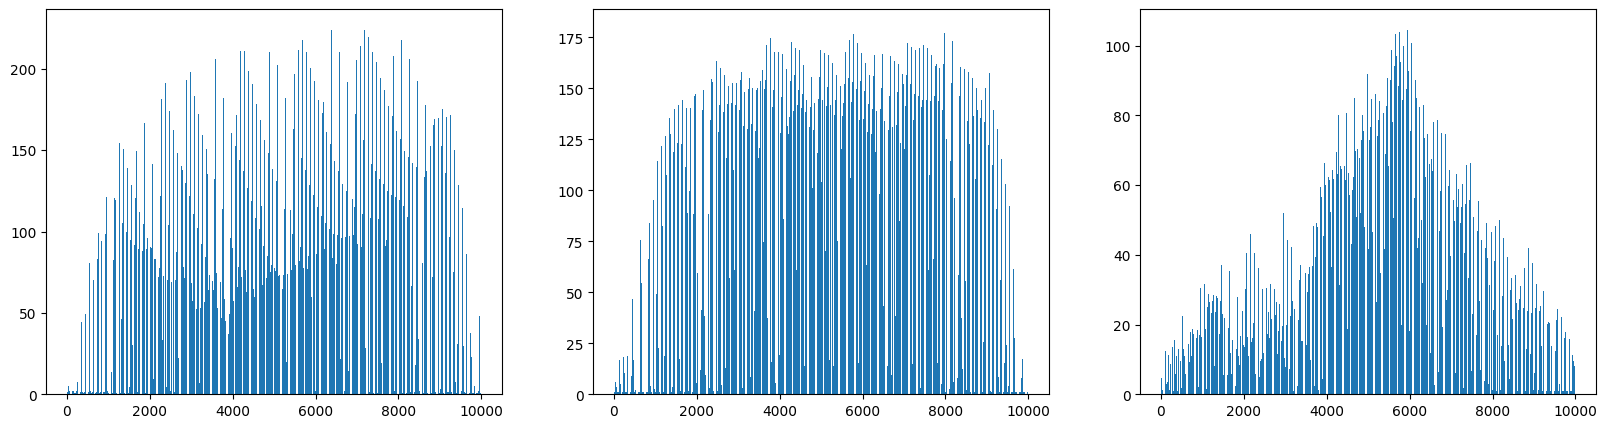

In [18]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

In [19]:
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [21]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [22]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [23]:
def draw_fruits(arr,ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
plt.show()

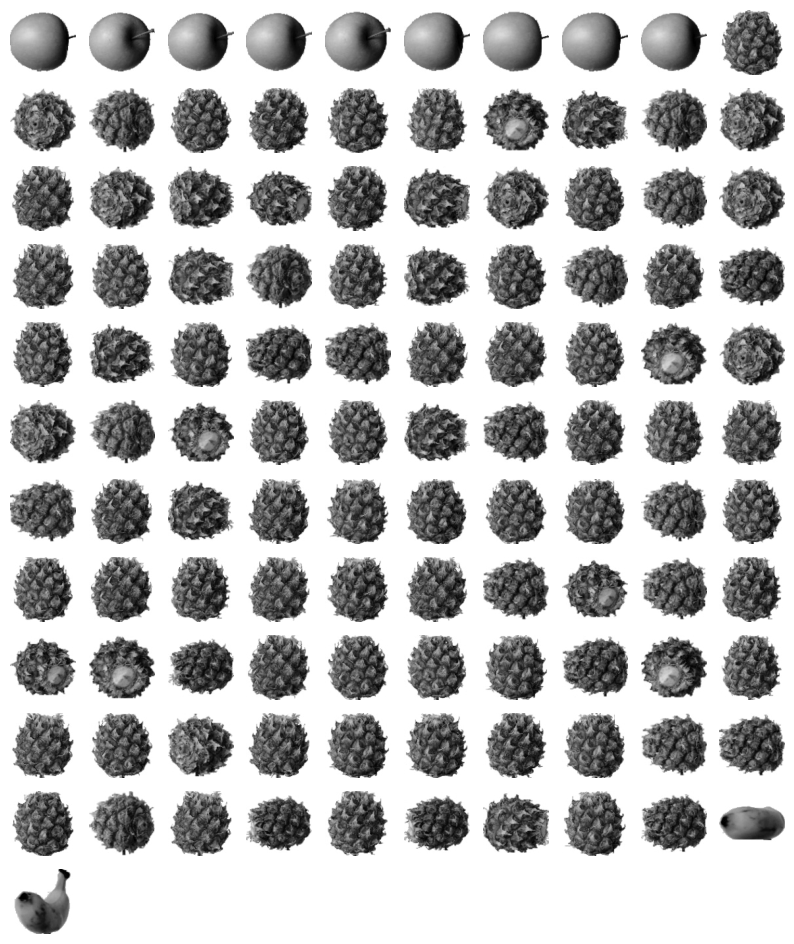

In [24]:
draw_fruits(fruits[km.labels_==0])

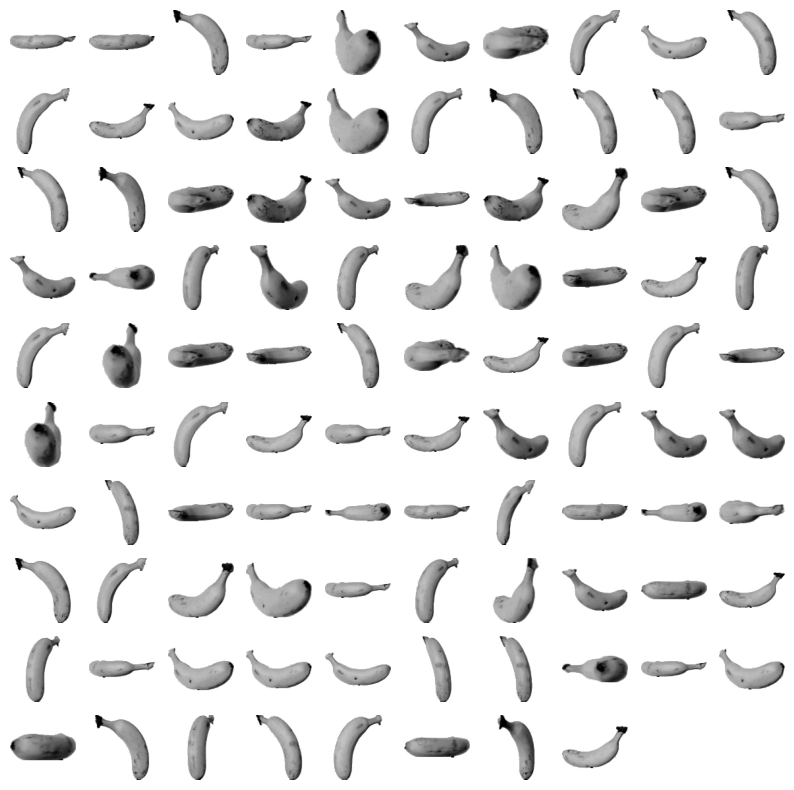

In [25]:
draw_fruits(fruits[km.labels_==1])

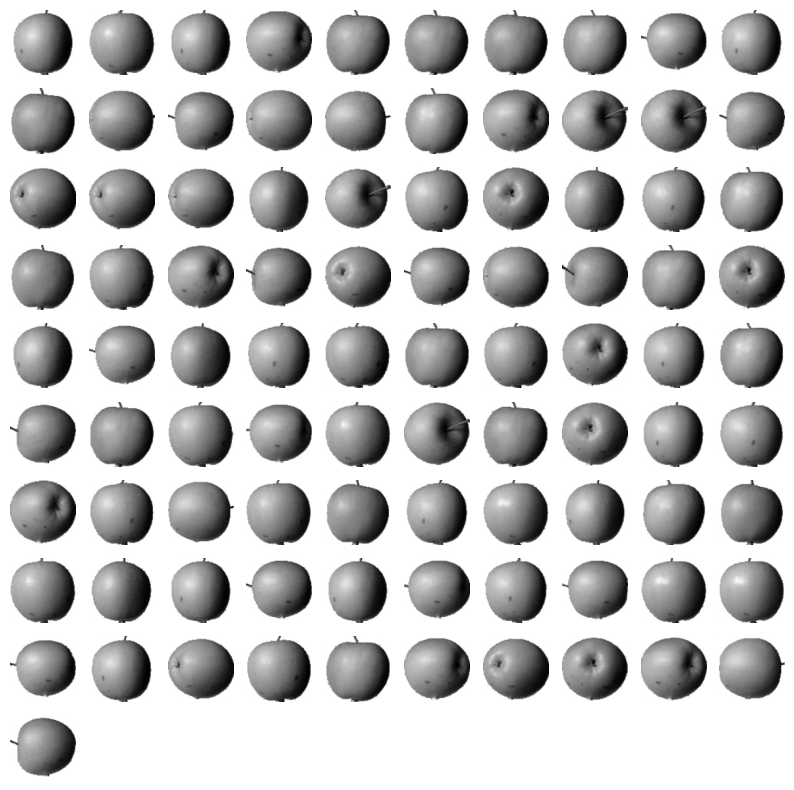

In [26]:
draw_fruits(fruits[km.labels_==2])

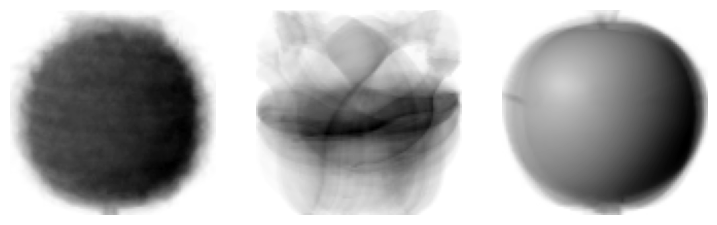

In [27]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

In [28]:
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [29]:
km.predict(fruits_2d[100:101]) # 4번 학습된 모델의 예측 값

array([0], dtype=int32)

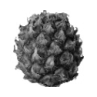

In [30]:
draw_fruits(fruits[100:101]) # 정답

In [31]:
km.n_iter_

4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

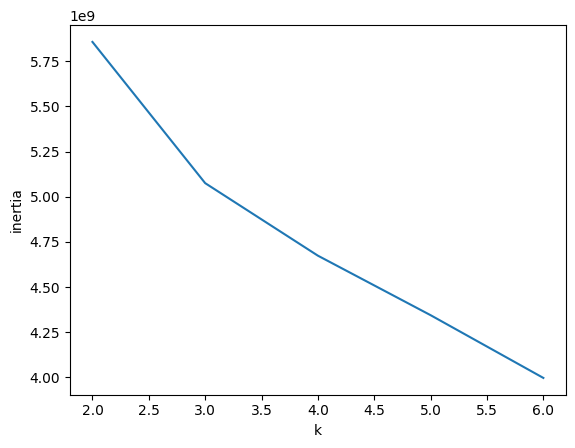

In [33]:
inertia = []
for k in range(2,7) :
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [34]:
# PCA 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [36]:
pca.components_.shape

(50, 10000)

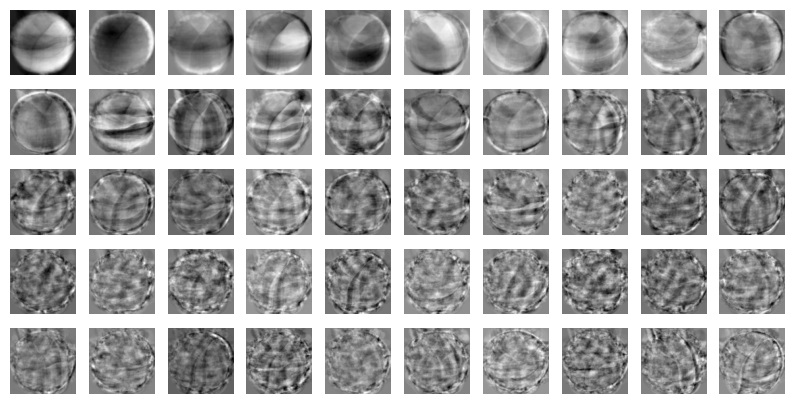

In [37]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [38]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [39]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

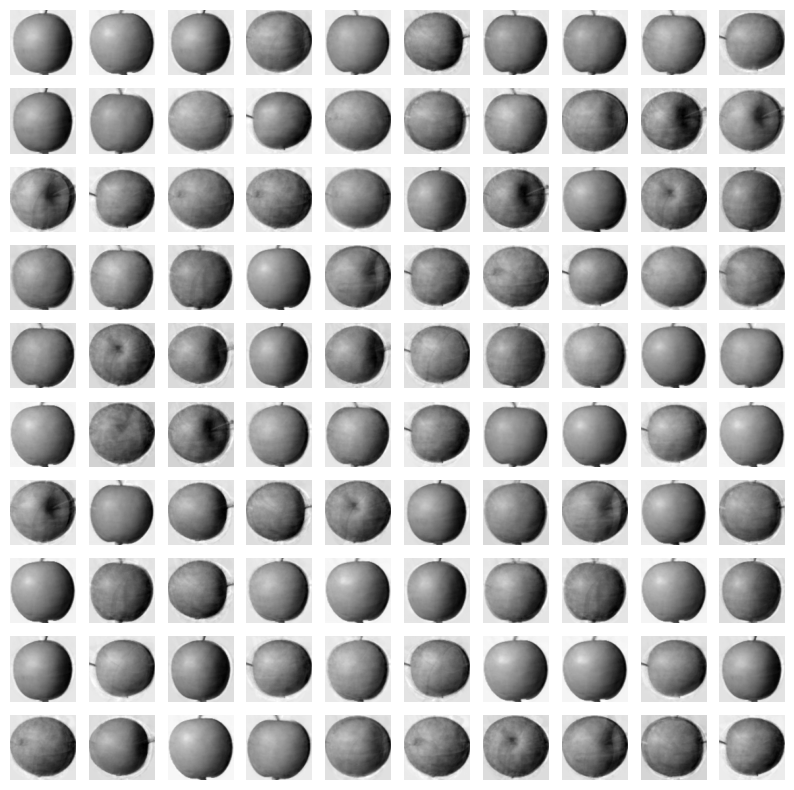

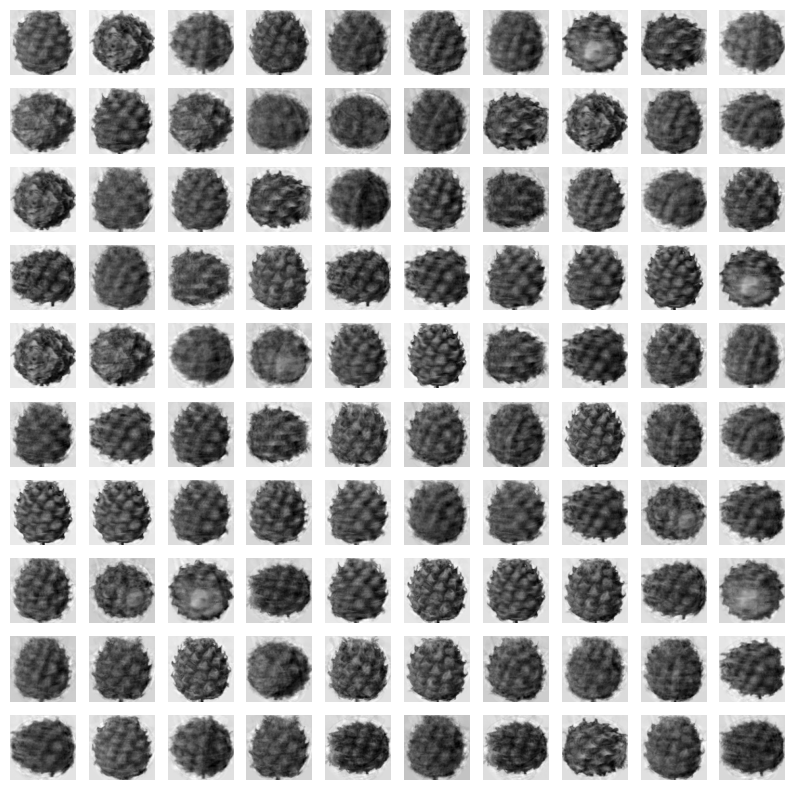

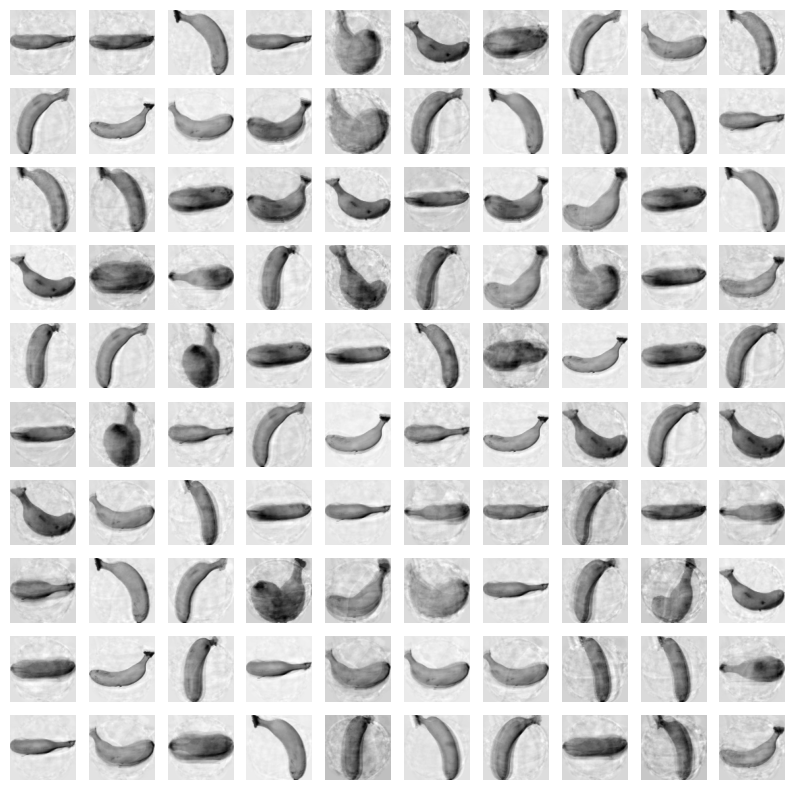

In [40]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
target = np.array([0]*100+[1]*100+[2]*100)

In [43]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)

In [44]:
np.mean(scores['test_score'])

0.9966666666666667

In [45]:
np.mean(scores['fit_time'])

2.904981851577759

In [46]:
scores = cross_validate(lr, fruits_pca, target)

In [47]:
np.mean(scores['test_score'])

1.0

In [49]:
np.mean(scores['fit_time']) # 차원이 축소되었기 때문에 빠름

0.03980579376220703

In [50]:
pca = PCA(n_components=0.5) # 설명된 분산이 총 50% 달하는 주성분을 찾도록
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [51]:
pca.n_components_ # 2개의 특성을 찾음

2

In [52]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [53]:
scores = cross_validate(lr,fruits_pca,target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [54]:
np.mean(scores['test_score'])

0.9933333333333334

In [55]:
np.mean(scores['fit_time'])

0.1481339931488037

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

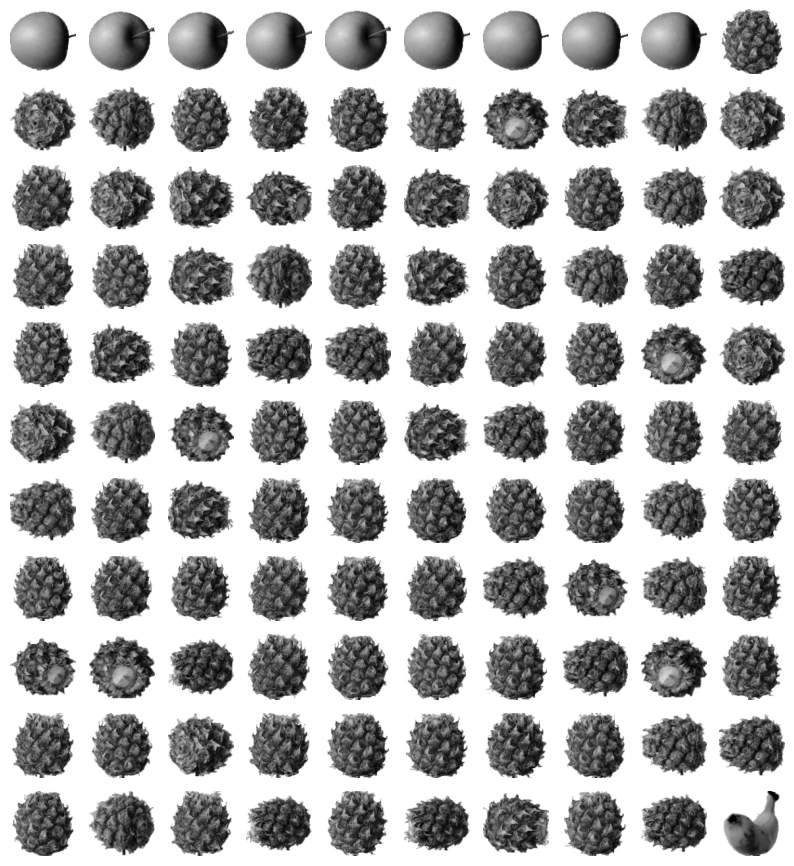

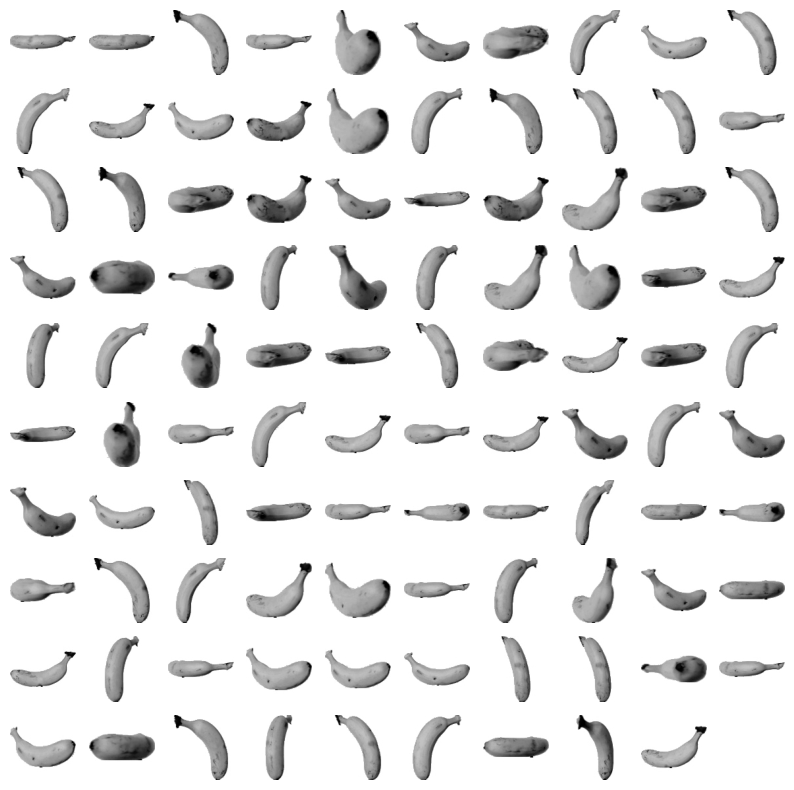

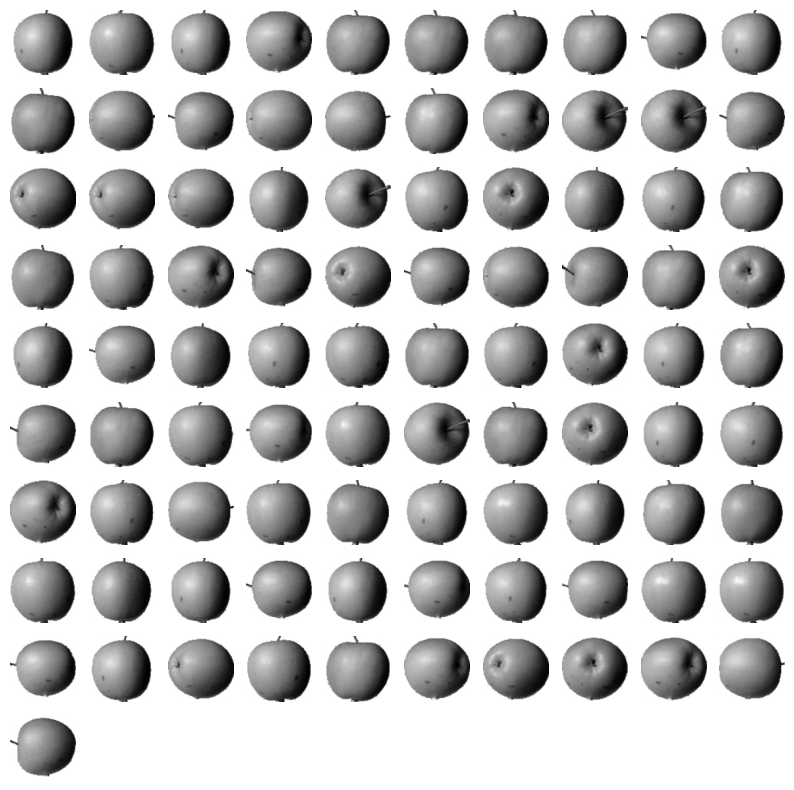

In [57]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

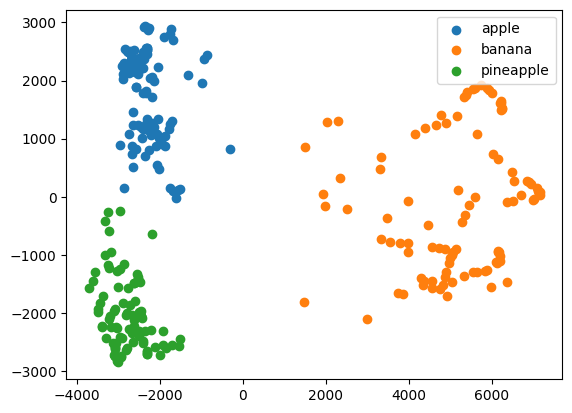

In [59]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana','pineapple'])
plt.show()

In [63]:
import numpy as np
npy_data = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/x_gray.npy')

In [67]:
import PIL.Image as pilimg
im = pilimg.open('/content/drive/MyDrive/Colab Notebooks/dataset/1.jpg') # rgb
im = pilimg.open('/content/drive/MyDrive/Colab Notebooks/dataset/1.jpg').convert('L') # gray

In [69]:
npy_data.shape

(1000, 64, 64)

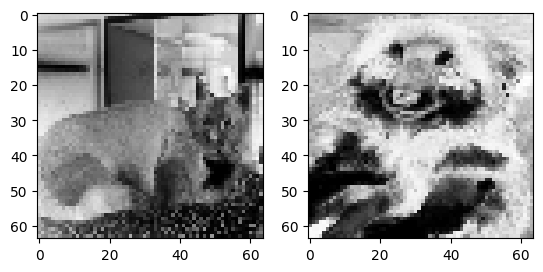

In [70]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(npy_data[50], cmap='gray_r')
axs[1].imshow(npy_data[850], cmap='gray_r')
plt.show()

In [71]:
# 픽셀데이터 (1000,64,64) -> 벡터로 변환 64*64
dogcat_2d = npy_data.reshape(-1,64*64)
# k-means 모델 학습 cluster=2, random_state=42 input data = 벡터로 변환된 dogcat_2d
km = KMeans(n_clusters=2, random_state=42)
km.fit(dogcat_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# 0번 클러스터로 분류한 데이터 확인 draw_fruits 함수 이용 km.labels_==0
draw_fruits(npy_data[km.labels_==0])

In [70]:
# 1번 클러스터로 분류한 데이터 확인
draw_fruits(npy_data[km.labels_==1])

In [73]:
# 클러스터별 분류된 샘플의 수 확인 np.unique 활용
np.unique(km.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([526, 474]))

In [74]:
# 주성분분석 모델 PCA 선언 n_components=0.5
# 모델 학습 fit
pca = PCA(n_components=0.5)
pca.fit(dogcat_2d)

PCA(n_components=0.5)

In [75]:
# 몇개의 특성을 찾았는지 출력 해보기
pca.n_components_ # 7개의 특성을 찾음

7

In [76]:
# 데이터 차원 축소 dogcat_2d 차원 축소된 데이터 변수명 : dogcat_pca
dogcat_pca = pca.transform(dogcat_2d)
dogcat_pca.shape

(1000, 7)

In [77]:
# k-means 모델 축소된 데이터 dogcat_pca로 모델 학습 n_cluster=2, random_state=42
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state=42)
km.fit(dogcat_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [80]:
# 클러스터별 분류된 샘플의 수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([438, 562]))

In [81]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [82]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

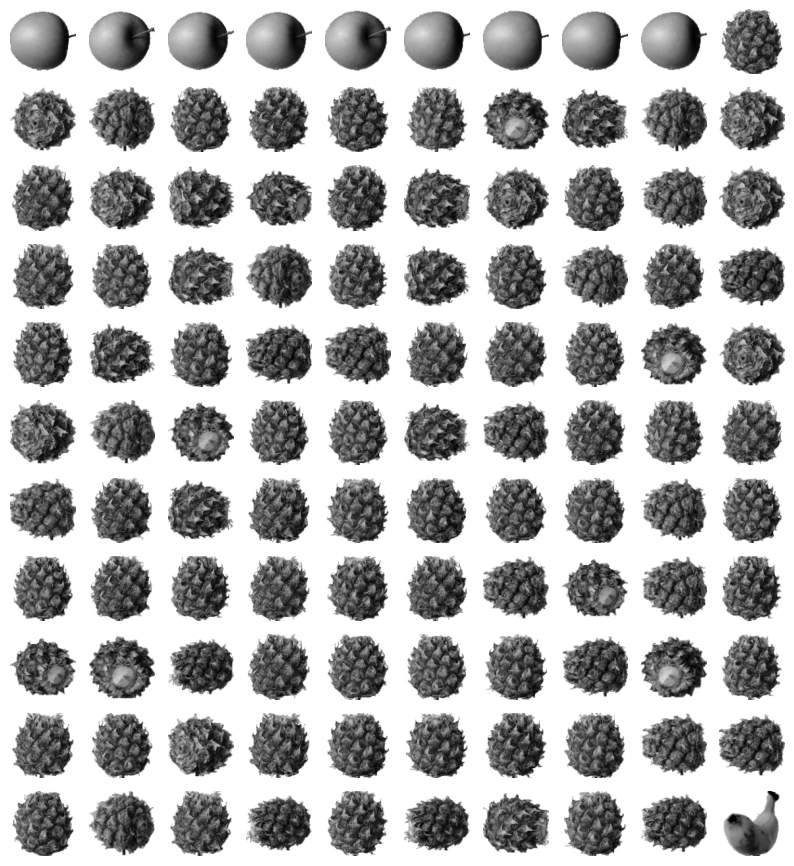

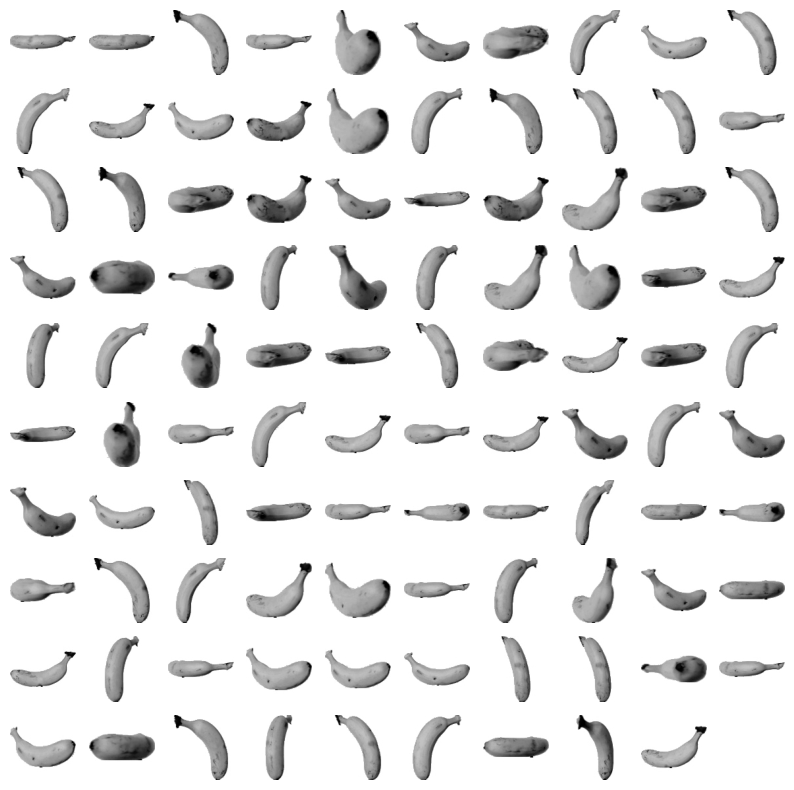

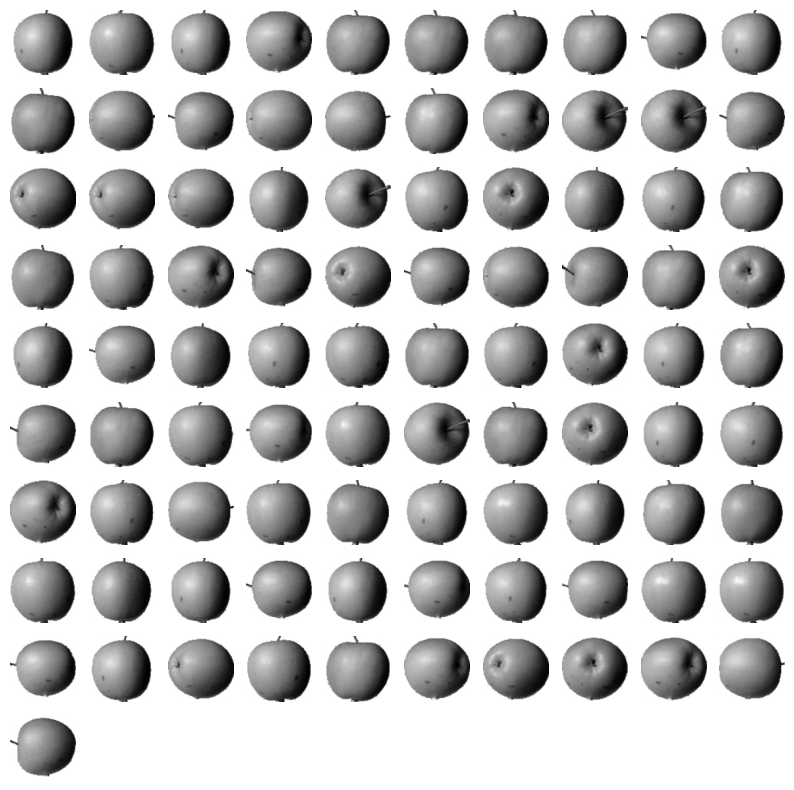

In [83]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')